In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# load and preprocess the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# reshape the data to add a channel dimension
# division by 255 scales the values in the range of [0, 1]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255






In [27]:
# convert labels to categorical one-hot encoding
# for multi class classification problems
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [29]:
# build CNN model

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding="same", activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding="same", activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding="same", activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))


# model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# train the model

history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8884 - loss: 0.3505 - val_accuracy: 0.9849 - val_loss: 0.0449
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9912 - loss: 0.0271 - val_accuracy: 0.9891 - val_loss: 0.0332
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9920 - val_loss: 0.0259
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9943 - loss: 0.0170 - val_accuracy: 0.9899 - val_loss: 0.0313


In [32]:
# evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9867 - loss: 0.0375

Test accuracy: 0.9898999929428101

Test loss: 0.03132902830839157


In [34]:
history.history

{'accuracy': [0.9548333287239075,
  0.9866666793823242,
  0.9903666377067566,
  0.9922333359718323,
  0.9943333268165588],
 'loss': [0.14635305106639862,
  0.04311085864901543,
  0.030316028743982315,
  0.023167582228779793,
  0.01806417480111122],
 'val_accuracy': [0.9848999977111816,
  0.9889000058174133,
  0.9890999794006348,
  0.9919999837875366,
  0.9898999929428101],
 'val_loss': [0.04491464048624039,
  0.03439866006374359,
  0.03320847451686859,
  0.02593594416975975,
  0.03132903203368187]}

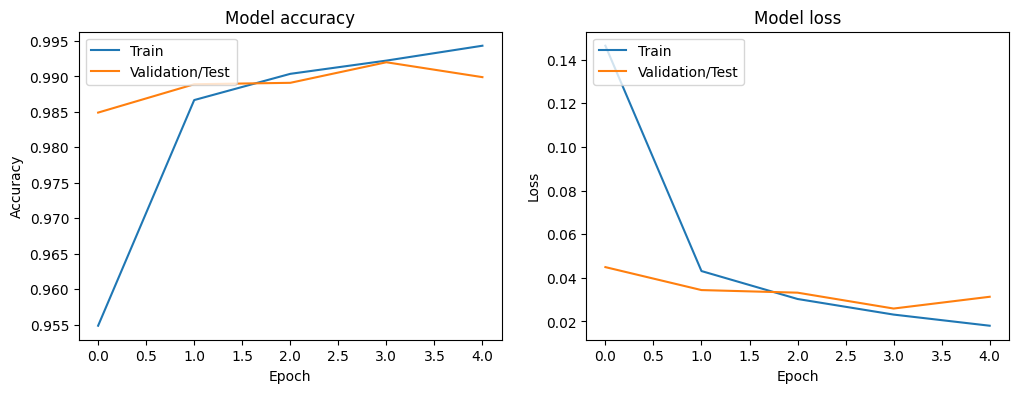

In [38]:
# plot training & validation accuracy and loss values

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = "Train Accuracy")
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation/Test'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation/Test'], loc = 'upper left')

plt.show()

In [40]:
# how to read images from a folder

import cv2

img = cv2.imread("/content/cat.jpg")

In [42]:
img.shape

(2804, 1862, 3)

In [44]:
reshaped = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

reshaped.shape

(1, 2804, 1862, 3)

In [46]:
reshaped[0]

array([[[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 58,  60,  48],
        [ 58,  59,  49],
        [ 59,  60,  50]],

       [[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 59,  61,  49],
        [ 58,  59,  49],
        [ 58,  59,  49]],

       [[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 57,  61,  50],
        [ 56,  59,  50],
        [ 55,  58,  49]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [124, 147, 149],
        [116, 139, 141],
        [114, 137, 139]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [127, 150, 152],
        [120, 143, 145],
        [118, 141, 143]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [125, 148, 150],
        [121, 144, 146],
        [120, 143, 145]]

In [47]:
# for multiple images

In [48]:
# import glob
from glob import glob
import numpy as np

# like an iterator for all images(png) in ImageFolder
files = glob("content/ImageFolder/*.png")


# list of images in vector form (matrix)
images = []

# store all images in a list
for image in files :
  imageMatrix = cv2.imread(image)
  imageMatrix = imageMatrix.reshape(imageMatrix, (28, 28))
  images.append(imageMatrix)



# convert the list into np array
images = np.array(images)

In [49]:
images


array([], dtype=float64)